<a href="https://colab.research.google.com/github/Rafaelmos/svm-makert-bancario/blob/main/svm_makert_bancario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre a base de dados

Esta base de dados está relacionada com campanhas de marketing direto (ligações telefônicas) de uma instituição bancária portuguesa. O objetivo da classificação é prever se o cliente se inscreverá em um depósito a prazo (variável y).

Link para base de dados: https://archive.ics.uci.edu/dataset/222/bank+marketing



Moro, S., Rita, P. e Cortez, P. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

Na base existe 4 conjuntos de dados:


*  bank-additional-full.csv com todos os exemplos (41188) e 20 entradas, ordenados por data (de maio de 2008 a novembro de 2010), muito próximos dos dados analisados por [Moro et al., 2014].
*   bank-additional.csv com 10% dos exemplos (4119), selecionados aleatoriamente a partir de 1), e 20 entradas.
*   bank-full.csv com todos os exemplos e 17 entradas, ordenados por data (versão anterior deste conjunto de dados com menos entradas).
*   bank.csv com 10% dos exemplos e 17 entradas, selecionados aleatoriamente de 3 (versão anterior deste conjunto de dados com menos entradas).

Escolhemos o conjunto de dados **"bank.csv"** para usarmos o algoritmo de aprendizado de máquina **Support Vector Machine (SVM)**





## Dados encontrados na base



**DADOS DO CLIENTE**

1.   **age: idade** (numérico)
2.   **job: tipo de emprego** (categórico: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3.   **marital: estado civil** (categórico: "married","divorced","single"; nota: "divorced" significa divorciado ou viúvo)
4.   **education: nível de escolaridade** (categórico: "unknown","secondary","primary","tertiary")
5.   **default: tem crédito em atraso?** (binário: "yes","no")
6.   **balance: saldo médio anual, em euros** (numérico)
7.   **housing: possui empréstimo habitacional?** (binário: "yes","no")
8.   **loan: possui empréstimo pessoal**? (binário: "yes","no")

**RELACIONADOS AO ÚLTIMO CONTATO DA CAMAPANHA ATUAL**

9.   **contact: tipo de comunicação de contato** (categórico: "unknown","telephone","cellular")
10.   **day: último dia de contato do mês** (numérico)
11.   **month: último mês de contato do ano** (categórico: "jan", "feb", "mar", ..., "nov", "dec")
12.   **duration: duração do último contato, em segundos** (numérico)

**OUTROS ATRIBUTOS**

13. **campaign: número de contatos realizados durante esta campanha e para este cliente** (numérico, inclui o último contato)
14. **pdays: número de dias que passaram após o último contato do cliente em uma campanha anterior**
(numérico, -1 significa que o cliente não foi contatado anteriormente)
15. **previous: número de contatos realizados antes desta campanha e para este cliente** (numérico)
16. **poutcome: resultado da campanha de marketing anterior** (categórico: "unknown","other","failure","success")
Variável de Saída (alvo desejado):
17. **y: o cliente se inscreveu em um depósito a prazo?** (binário: "yes","no")


# Upload da Base de Dados

In [ ]:
from google.colab import files
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Faça o upload do arquivo
uploaded = files.upload()

# Leia o arquivo CSV em um DataFrame do pandas
# Use o parâmetro delimiter para especificar o ponto e vírgula como separador
# Use o parâmetro quoting para remover as aspas
df = pd.read_csv(next(iter(uploaded)), delimiter=';', quoting=3)

# Mostre as primeiras linhas do DataFrame para verificar se a leitura foi bem-sucedida
#print(df.head())


Saving bank.csv to bank (7).csv


In [ ]:
df.head()

,"""age""","""job""","""marital""","""education""","""default""","""balance""","""housing""","""loan""","""contact""","""day""","""month""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""y"""
0,30,"""unemployed""","""married""","""primary""","""no""",1787,"""no""","""no""","""cellular""",19,"""oct""",79,1,-1,0,"""unknown""","""no"""
1,33,"""services""","""married""","""secondary""","""no""",4789,"""yes""","""yes""","""cellular""",11,"""may""",220,1,339,4,"""failure""","""no"""
2,35,"""management""","""single""","""tertiary""","""no""",1350,"""yes""","""no""","""cellular""",16,"""apr""",185,1,330,1,"""failure""","""no"""
3,30,"""management""","""married""","""tertiary""","""no""",1476,"""yes""","""yes""","""unknown""",3,"""jun""",199,4,-1,0,"""unknown""","""no"""
4,59,"""blue-collar""","""married""","""secondary""","""no""",0,"""yes""","""no""","""unknown""",5,"""may""",226,1,-1,0,"""unknown""","""no"""


# Resumo Estatístico Inicial:

In [ ]:
# Use a função 'describe()' para obter um resumo estatístico
resumo_estatistico = df.describe()

# Exiba o resumo estatístico
print(resumo_estatistico)

             "age"     "balance"        "day"   "duration"   "campaign"  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

           "pdays"   "previous"  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000  


In [ ]:
df.describe()

,"""age""","""balance""","""day""","""duration""","""campaign""","""pdays""","""previous"""
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

"age"          0
"job"          0
"marital"      0
"education"    0
"default"      0
"balance"      0
"housing"      0
"loan"         0
"contact"      0
"day"          0
"month"        0
"duration"     0
"campaign"     0
"pdays"        0
"previous"     0
"poutcome"     0
"y"            0
dtype: int64

## Distribuições das Variáveis Numéricas:

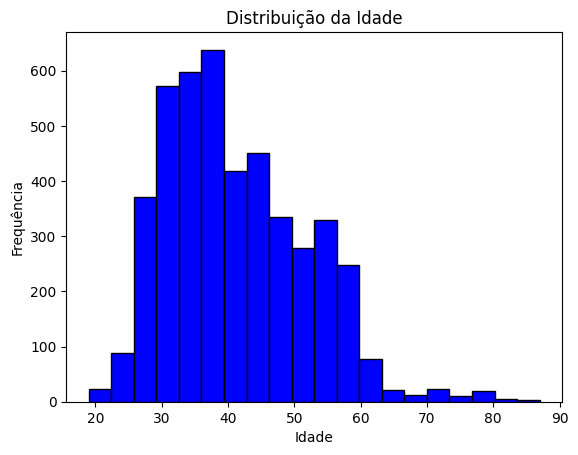

In [ ]:
import matplotlib.pyplot as plt

# Histograma para a variável "age"
plt.hist(df['"age"'], bins=20, color='blue', edgecolor='black')
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


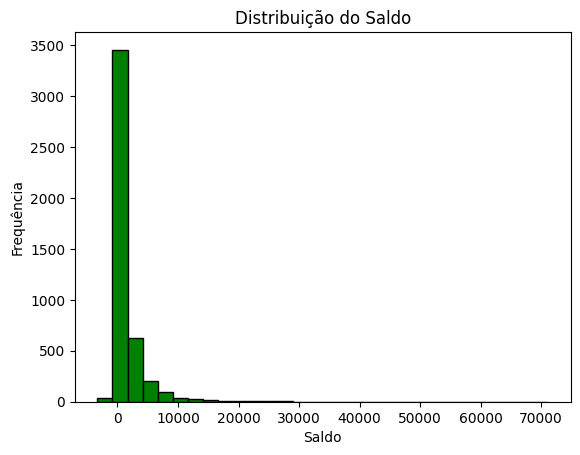

In [ ]:
# Histograma para a variável "balance"
plt.hist(df['"balance"'], bins=30, color='green', edgecolor='black')
plt.title('Distribuição do Saldo')
plt.xlabel('Saldo')
plt.ylabel('Frequência')
plt.show()

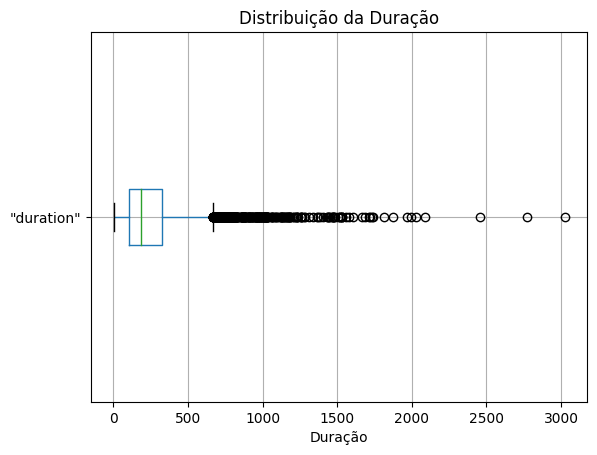

In [ ]:
# Gráfico de caixa para a variável "duration"
df.boxplot(column='"duration"', vert=False)
plt.title('Distribuição da Duração')
plt.xlabel('Duração')
plt.show()

## Distribuições das Variáveis Categóricas:


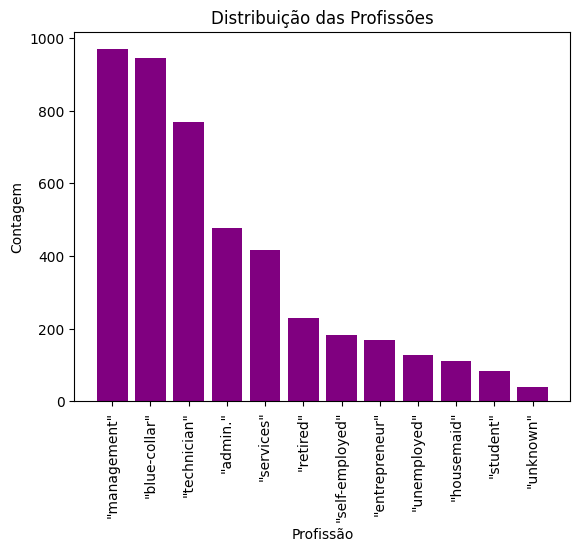

In [ ]:
# Gráfico de barras para a variável "job"
job_counts = df['"job"'].value_counts()
plt.bar(job_counts.index, job_counts.values, color='purple')
plt.title('Distribuição das Profissões')
plt.xlabel('Profissão')
plt.ylabel('Contagem')
plt.xticks(rotation=90)
plt.show()

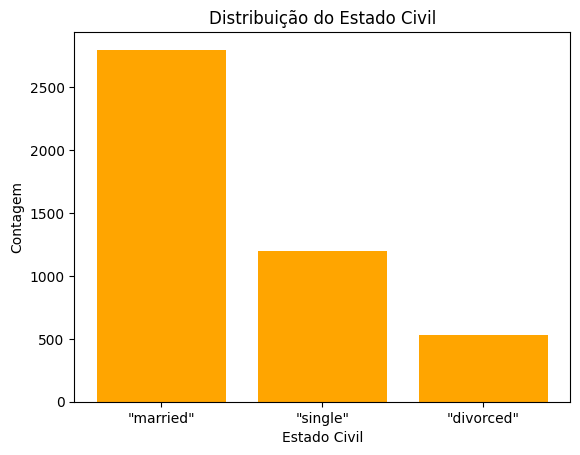

In [ ]:
# Gráfico de barras para a variável "marital"
marital_counts = df['"marital"'].value_counts()
plt.bar(marital_counts.index, marital_counts.values, color='orange')
plt.title('Distribuição do Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Contagem')
plt.show()

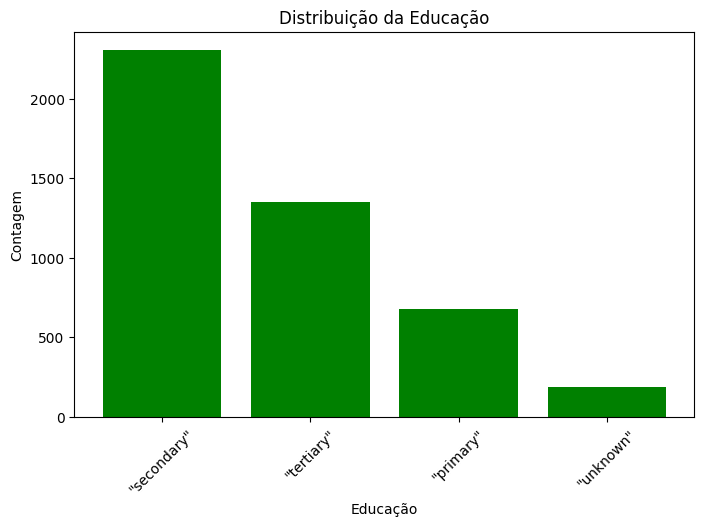

In [ ]:
# Gráfico de barras para a variável "education"
education_counts = df['"education"'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(education_counts.index, education_counts.values, color='green')
plt.title('Distribuição da Educação')
plt.xlabel('Educação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.show()


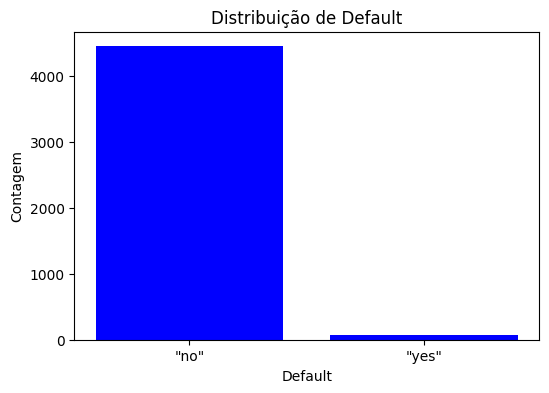

In [ ]:
# Gráfico de barras para a variável "default"
default_counts = df['"default"'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(default_counts.index, default_counts.values, color='blue')
plt.title('Distribuição de Default')
plt.xlabel('Default')
plt.ylabel('Contagem')
plt.show()


## Correlação entre Variáveis Numéricas:

Neste exemplo, selecionamos as variáveis numéricas "age", "balance", "duration", "campaign", "pdays", "previous" para calcular a matriz de correlação. O mapa de calor mostra os valores de correlação entre essas variáveis. Valores próximos a 1 indicam correlação positiva, valores próximos a -1 indicam correlação negativa, e valores próximos a 0 indicam correlação fraca ou nula.

Interprete o mapa de calor para entender como as variáveis numéricas estão relacionadas entre si. Isso pode ajudar a identificar quais variáveis têm uma relação mais forte e podem ser importantes em análises ou modelagem futuras.

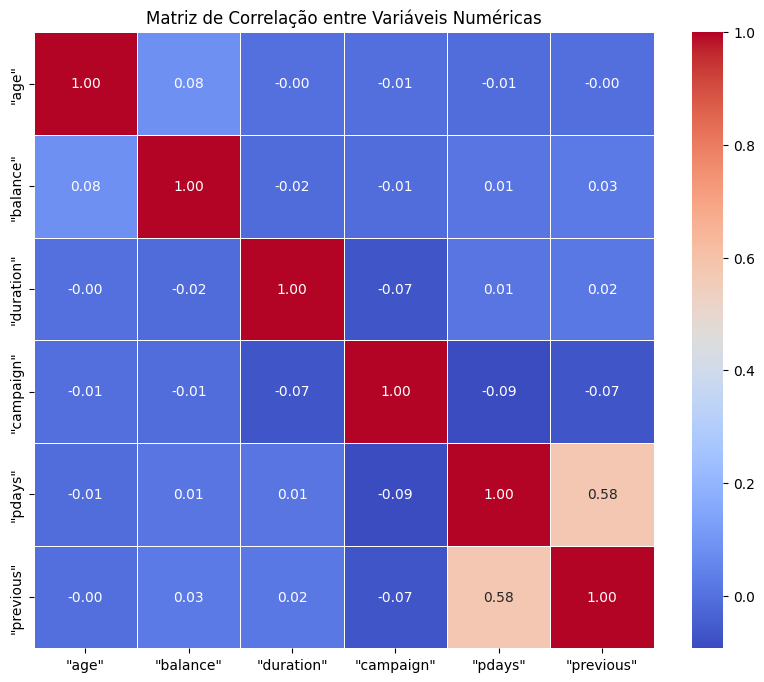

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula a matriz de correlação para as variáveis numéricas
correlation_matrix = df[['"age"', '"balance"', '"duration"', '"campaign"', '"pdays"', '"previous"']].corr()

# Cria um mapa de calor (heatmap) da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()


## Exploração de Valores Ausentes:



In [ ]:
# Verificar valores ausentes em todo o conjunto de dados
missing_values = df.isnull().sum()

# Exibir os valores ausentes por coluna
print(missing_values)

"age"          0
"job"          0
"marital"      0
"education"    0
"default"      0
"balance"      0
"housing"      0
"loan"         0
"contact"      0
"day"          0
"month"        0
"duration"     0
"campaign"     0
"pdays"        0
"previous"     0
"poutcome"     0
"y"            0
dtype: int64


In [ ]:
# Exemplo de remoção de linhas com valores ausentes
#df_cleaned = df.dropna()



## Visualização de Relações:

Neste exemplo, estamos plotando um gráfico de dispersão entre as variáveis "age" e "balance" e usando a cor para representar a variável de destino "y" (subscrição de depósito a prazo). Isso permite visualizar como a idade e o saldo estão relacionados à subscrição.

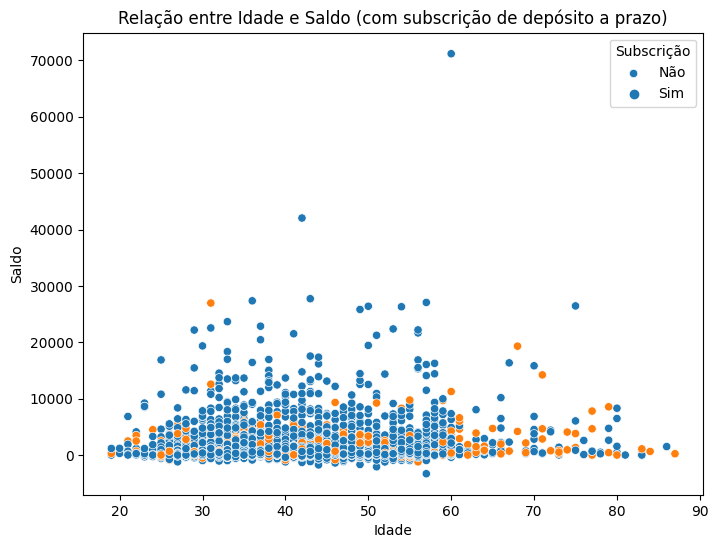

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exemplo: Gráfico de dispersão entre "age" e "balance"
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['"age"'], y=df['"balance"'], hue=df['"y"'])
plt.title('Relação entre Idade e Saldo (com subscrição de depósito a prazo)')
plt.xlabel('Idade')
plt.ylabel('Saldo')
plt.legend(title='Subscrição', labels=['Não', 'Sim'])
plt.show()


Neste exemplo, estamos usando um gráfico de barras empilhadas para visualizar a relação entre a variável categórica "job" (profissão) e a variável de destino "y" (subscrição de depósito a prazo). Isso permite ver como diferentes profissões estão relacionadas à subscrição.

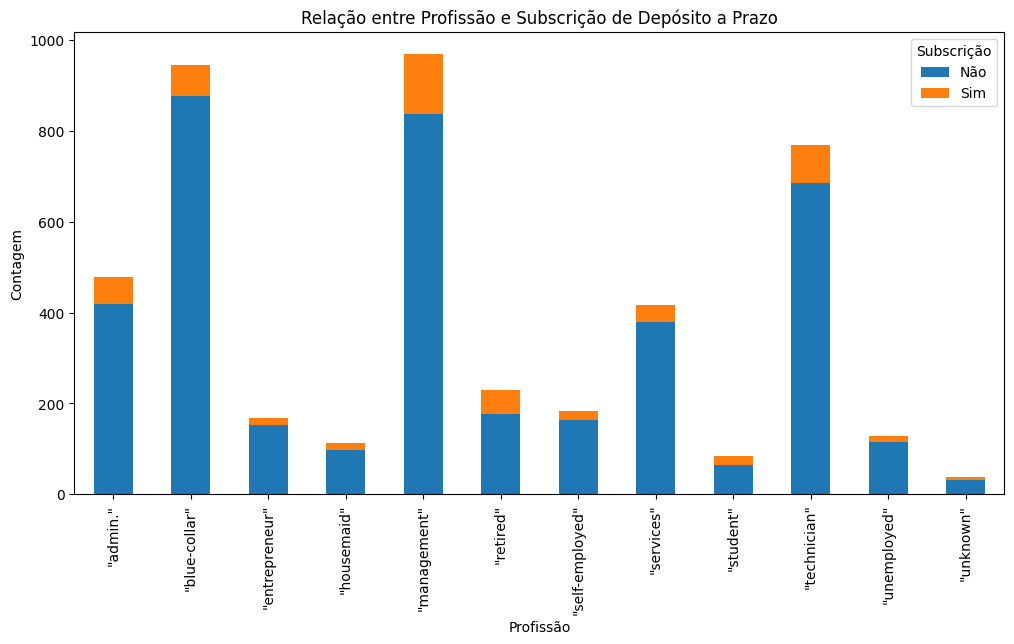

In [ ]:
# Exemplo: Gráfico de barras empilhadas para a relação entre "job" e "y"
job_y_counts = df.groupby(['"job"', '"y"']).size().unstack()
job_y_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Relação entre Profissão e Subscrição de Depósito a Prazo')
plt.xlabel('Profissão')
plt.ylabel('Contagem')
plt.legend(title='Subscrição', labels=['Não', 'Sim'])
plt.xticks(rotation=90)
plt.show()


## Análise da Variável de Destino:

In [ ]:
import matplotlib.pyplot as plt

# Calcule a distribuição das classes na variável de destino "y"
y_distribution = df['"y"'].value_counts()

# Exiba a distribuição das classes
print("Distribuição da Variável de Destino (Subscrição de Depósitos a Prazo):")
print(y_distribution)


Distribuição da Variável de Destino (Subscrição de Depósitos a Prazo):
"no"     4000
"yes"     521
Name: "y", dtype: int64


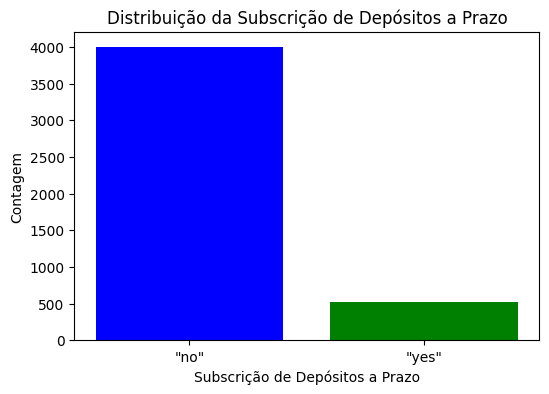

In [ ]:
# Gráfico de barras para visualizar a distribuição da variável de destino
plt.figure(figsize=(6, 4))
plt.bar(y_distribution.index, y_distribution.values, color=['blue', 'green'])
plt.title('Distribuição da Subscrição de Depósitos a Prazo')
plt.xlabel('Subscrição de Depósitos a Prazo')
plt.ylabel('Contagem')
plt.show()


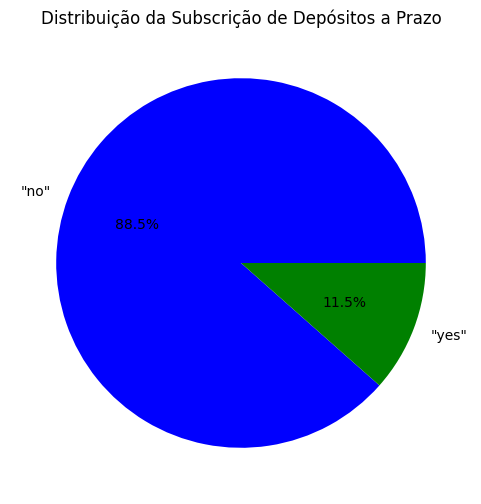

In [ ]:
# Gráfico de pizza para visualizar a distribuição da variável de destino
plt.figure(figsize=(6, 6))
plt.pie(y_distribution, labels=y_distribution.index, autopct='%1.1f%%', colors=['blue', 'green'])
plt.title('Distribuição da Subscrição de Depósitos a Prazo')
plt.show()


## Análise de Disparidades e Relações Importantes:

In [ ]:
"""correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['"y"'].sort_values(ascending=False)
print(correlation_with_target)"""


'correlation_matrix = df.corr()\ncorrelation_with_target = correlation_matrix[\'"y"\'].sort_values(ascending=False)\nprint(correlation_with_target)'

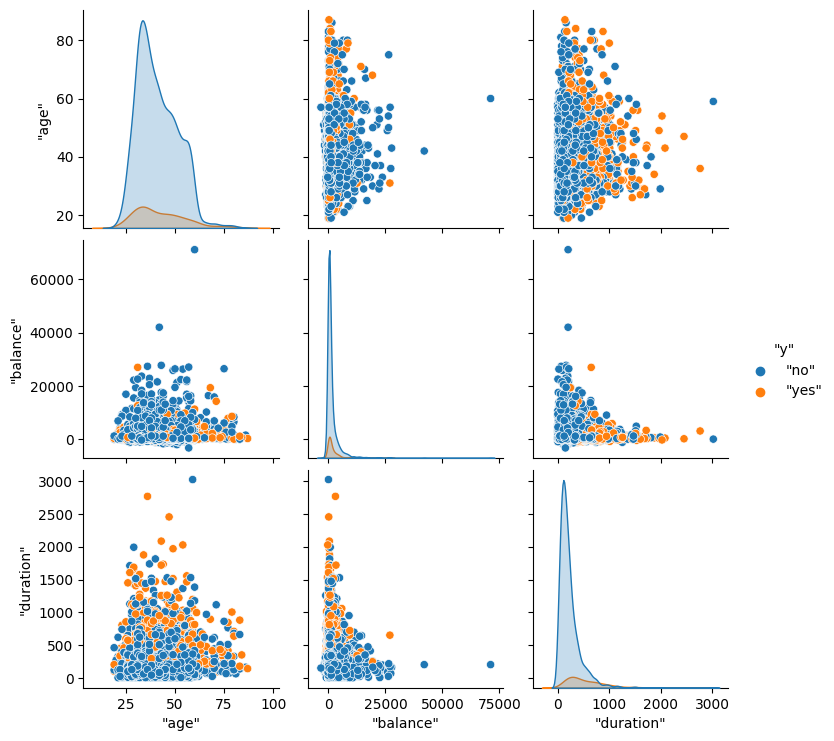

In [ ]:
import seaborn as sns

sns.pairplot(df, vars=['"age"', '"balance"', '"duration"'], hue='"y"')
plt.show()


In [ ]:
from scipy import stats

subscribed = df[df['"y"'] == 'yes']
not_subscribed = df[df['"y"'] == 'no']

# Exemplo de teste t para idade
t_stat, p_value = stats.ttest_ind(subscribed['"age"'], not_subscribed['"age"'])
print(f'T-Statistic: {t_stat}, p-value: {p_value}')


T-Statistic: nan, p-value: nan


In [ ]:
"""# Gráfico de barras empilhadas para o estado civil (marital) em relação à subscrição
marital_subscribed = df[df['"y"'] == 'yes']['"marital"'].value_counts()
marital_not_subscribed = df[df['"y"'] == 'no']['"marital"'].value_counts()

marital_df = pd.DataFrame({'Subscribed': marital_subscribed, 'Not Subscribed': marital_not_subscribed})
marital_df.plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status vs. Subscription')
plt.show()"""


'# Gráfico de barras empilhadas para o estado civil (marital) em relação à subscrição\nmarital_subscribed = df[df[\'"y"\'] == \'yes\'][\'"marital"\'].value_counts()\nmarital_not_subscribed = df[df[\'"y"\'] == \'no\'][\'"marital"\'].value_counts()\n\nmarital_df = pd.DataFrame({\'Subscribed\': marital_subscribed, \'Not Subscribed\': marital_not_subscribed})\nmarital_df.plot(kind=\'bar\', stacked=True)\nplt.xlabel(\'Marital Status\')\nplt.ylabel(\'Count\')\nplt.title(\'Marital Status vs. Subscription\')\nplt.show()'

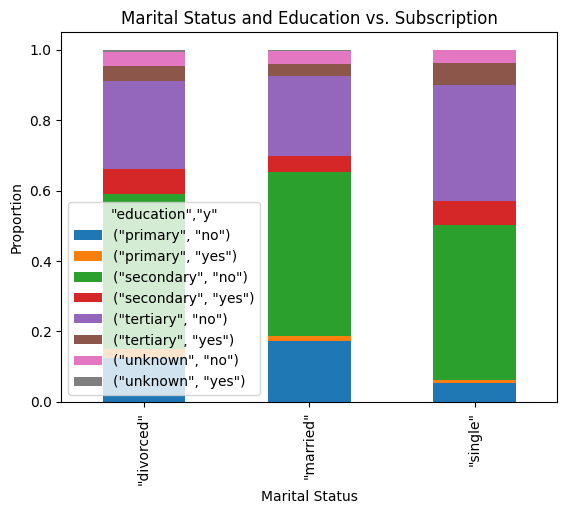

In [ ]:
# Exemplo de gráfico de barras empilhadas para "marital" e "education" em relação à subscrição
pd.crosstab(index=df['"marital"'], columns=[df['"education"'], df['"y"']], normalize='index').plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.title('Marital Status and Education vs. Subscription')
plt.show()


# Normalização categórica da base

Os dois métodos de normalização categórica foram utilizados

- Ordinal Encoding: **education** e **month**. Pois, podemos estabelecer uma ordem hierárquica entre os valores.

- Label Encoding: **job**, **default**, **housing**, **loan**, **contact**, **poutcome**, **y**. Já que os valores são coisas como _masculino_, _feminino_ e _yes_, _no_, label encoding é o que melhor se encaixa.



### ORDINAL ENCODING
**VERIFICANDO QUAIS SÃO OS VALORES ÚNICOS DAS COLUNAS ESCOLHIDAS PARA ORDINAL ENCODING**




In [ ]:
import pandas as pd

unique_items = df['"marital"'].unique()
print(unique_items)

unique_items = df['"education"'].unique()
print(unique_items)

unique_items2 = df['"month"'].unique()
print(unique_items2)

['"married"' '"single"' '"divorced"']
['"primary"' '"secondary"' '"tertiary"' '"unknown"']
['"oct"' '"may"' '"apr"' '"jun"' '"feb"' '"aug"' '"jan"' '"jul"' '"nov"'
 '"sep"' '"mar"' '"dec"']


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

## Ordinal (Ordinal Encoding)
ordinal_columns = ['"marital"','"education"', '"month"']
edu_options = ['"unknown"','"primary"' ,'"secondary"' ,'"tertiary"']
moth_options = ["zero",'"jan"', '"feb"', '"mar"', '"apr"','"may"','"jun"','"jul"','"aug"','"sep"','"oct"','"nov"', '"dec"']
marital_options = ['"single"','"married"','"divorced"']
ordinal_encode = OrdinalEncoder(categories=[marital_options, edu_options, moth_options])
df[ordinal_columns] = ordinal_encode.fit_transform(df[ordinal_columns])

In [ ]:
import pandas as pd

unique_items = df['"marital"'].unique()
print(unique_items)

unique_items = df['"education"'].unique()
print(unique_items)

unique_items2 = df['"month"'].unique()
print(unique_items2)

[1. 0. 2.]
[1. 2. 3. 0.]
[10.  5.  4.  6.  2.  8.  1.  7. 11.  9.  3. 12.]


### LABEL ENCODING
**VERIFICANDO QUAIS SÃO OS VALORES ÚNICOS DAS COLUNAS ESCOLHIDAS PARA LABEL ENCODING**


In [ ]:
from sklearn.preprocessing import LabelEncoder


## Label (Label Encoding)
label_columns = ['"job"', '"default"', '"housing"', '"loan"', '"contact"', '"poutcome"', '"y"']
label_encode = LabelEncoder()
for col in label_columns:
    df[col] = label_encode.fit_transform(df[col])

## Remoção de Colunas

In [ ]:
x = df.drop(columns=['"y"'], axis=1)

y = df['"y"']

# Treinamento do Modelo

# Análise dos resultados